In [1]:
# Параметры модели
b = 0.0005  # Скорость инфицирования
g = 0.1    # Скорость производства вирусов инфицированными клетками
mu = 0.01      # Скорость гибели клеток
nu = 2         # Скорость гибели вирусов

# Расчет основного репродуктивного числа R0
R0 = (b * g) / (mu * nu)

# Вывод результата
print(f"Основное репродуктивное число (R0): {R0}")

# Анализ устойчивости
if R0 < 1:
    print("Состояние без болезни (DFE) устойчиво, инфекция исчезает.")
else:
    print("Состояние без болезни неустойчиво, инфекция распространяется.")


Основное репродуктивное число (R0): 0.0025
Состояние без болезни (DFE) устойчиво, инфекция исчезает.


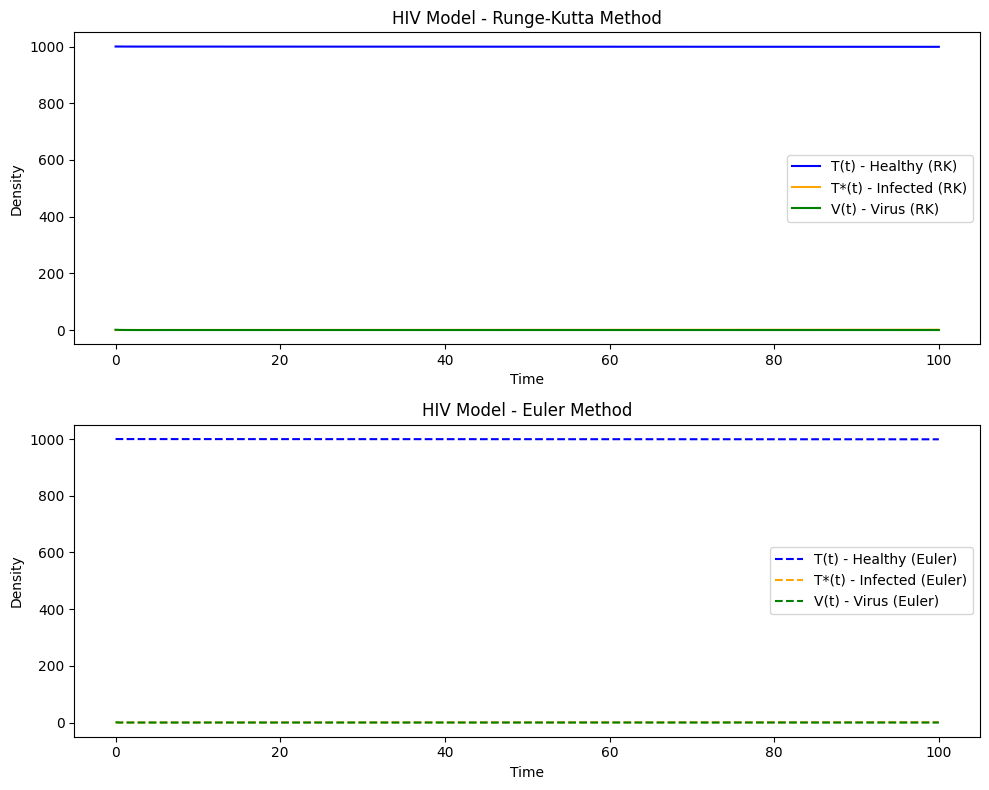

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры модели
A = 10       # Производство здоровых клеток T
b = 0.0005 # Скорость инфицирования
mu = 0.01    # Скорость гибели клеток
g = 0.1  # Скорость производства вирусов
nu = 2       # Скорость гибели вирусов

# Начальные условия
T0 = 1000    # Здоровые клетки
T_star0 = 0  # Инфицированные клетки
V0 = 1       # Вирусы
initial_conditions = [T0, T_star0, V0]

# Время моделирования
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 200)

# Система уравнений модели ВИЧ
def hiv_model(t, y):
    T, T_star, V = y
    dT_dt = A - b * T * V - mu * T
    dT_star_dt = b * T * V - mu * T_star
    dV_dt = g * T_star - nu * V
    return [dT_dt, dT_star_dt, dV_dt]

# Решение методом Рунге-Кутта (solve_ivp использует RK45 по умолчанию)
rk_solution = solve_ivp(hiv_model, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Реализация метода Эйлера
def euler_method(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * np.array(f(t[i-1], y[i-1]))
    return y

# Решение методом Эйлера
euler_solution = euler_method(hiv_model, initial_conditions, t_eval)

# Построение графиков
plt.figure(figsize=(10, 8))

# График для T(t), T*(t), и V(t) - Рунге-Кутта
plt.subplot(2, 1, 1)
plt.plot(rk_solution.t, rk_solution.y[0], label='T(t) - Healthy (RK)', color='blue')
plt.plot(rk_solution.t, rk_solution.y[1], label='T*(t) - Infected (RK)', color='orange')
plt.plot(rk_solution.t, rk_solution.y[2], label='V(t) - Virus (RK)', color='green')
plt.title('HIV Model - Runge-Kutta Method')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

# График для T(t), T*(t), и V(t) - Эйлер
plt.subplot(2, 1, 2)
plt.plot(t_eval, euler_solution[:, 0], label='T(t) - Healthy (Euler)', color='blue', linestyle='dashed')
plt.plot(t_eval, euler_solution[:, 1], label='T*(t) - Infected (Euler)', color='orange', linestyle='dashed')
plt.plot(t_eval, euler_solution[:, 2], label='V(t) - Virus (Euler)', color='green', linestyle='dashed')
plt.title('HIV Model - Euler Method')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()